<a href="https://colab.research.google.com/github/spacewal/kmean_clustering/blob/main/Kmean_clustering_module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import altair as alt

# 1. Dataset Sourcing:

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/spacewal/kmean_clustering/main/retail_dataset.csv")

# 2. Exploratory Data Analysis (EDA):

In [5]:
df.head(5)

Unnamed: 0  InvoiceID        Date  ProductID  TotalSales    Discount  \
0           0        328  2019-12-27       1684  796.610169  143.389831   
1           1        329  2019-12-27        524  355.932203   64.067797   
2           2        330  2019-12-27        192  901.694915  162.305085   
3           3        330  2019-12-27        218  182.754237   32.895763   
4           4        330  2019-12-27        247  780.101695  140.418305   

   CustomerID  Quantity  
0         185         4  
1         185         2  
2         230         4  
3         230         1  
4         230         4

In [6]:
df.info() # change date dtype to datetime, delete column "unnamed: 0" for redundency, and change InvoiceID, ProductID, and CustomerID datatype to string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29103 entries, 0 to 29102
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  29103 non-null  int64  
 1   InvoiceID   29103 non-null  int64  
 2   Date        29103 non-null  object 
 3   ProductID   29103 non-null  int64  
 4   TotalSales  29103 non-null  float64
 5   Discount    29103 non-null  float64
 6   CustomerID  29103 non-null  int64  
 7   Quantity    29103 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.8+ MB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.astype({'InvoiceID': str, 'ProductID': str, 'CustomerID': str})
df = df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29103 entries, 0 to 29102
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   InvoiceID   29103 non-null  object        
 1   Date        29103 non-null  datetime64[ns]
 2   ProductID   29103 non-null  object        
 3   TotalSales  29103 non-null  float64       
 4   Discount    29103 non-null  float64       
 5   CustomerID  29103 non-null  object        
 6   Quantity    29103 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.6+ MB


In [8]:
df.describe()

TotalSales      Discount      Quantity
count   29103.000000  29103.000000  29103.000000
mean     2552.679147    451.325294      5.440367
std      4568.256400    650.359457      6.804637
min         0.000000     -0.004694      0.000000
25%       779.661017    137.288136      2.000000
50%      1366.101695    244.067797      4.000000
75%      2847.457627    508.658644      4.000000
max    332574.460000  14110.169492    250.000000

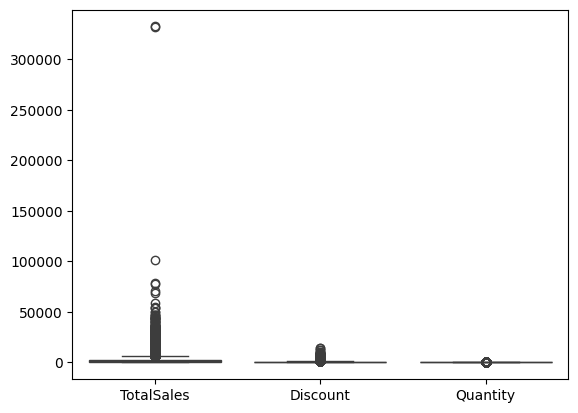

In [9]:
# Create a box plot
sns.boxplot(data=df)
plt.show()

In [10]:
# Calculate Q1 and Q3
Q1 = df['TotalSales'].quantile(0.25)
Q3 = df['TotalSales'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the upper and lower bounds for capping
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

# Cap the values
df['TotalSales_capped'] = df['TotalSales'].clip(lower_bound, upper_bound)

In [11]:
# Calculate Q1 and Q3
Q1 = df['Discount'].quantile(0.25)
Q3 = df['Discount'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the upper and lower bounds for capping
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

# Cap the values
df['Discount_capped'] = df['Discount'].clip(lower_bound, upper_bound)

In [13]:
df.describe()

TotalSales      Discount      Quantity  TotalSales_capped  \
count   29103.000000  29103.000000  29103.000000       29103.000000   
mean     2552.679147    451.325294      5.440367        2065.015591   
std      4568.256400    650.359457      6.804637        1749.538475   
min         0.000000     -0.004694      0.000000           0.000000   
25%       779.661017    137.288136      2.000000         779.661017   
50%      1366.101695    244.067797      4.000000        1366.101695   
75%      2847.457627    508.658644      4.000000        2847.457627   
max    332574.460000  14110.169492    250.000000        5949.152542   

       Discount_capped  
count     29103.000000  
mean        368.031625  
std         314.730497  
min          -0.004694  
25%         137.288136  
50%         244.067797  
75%         508.658644  
max        1065.714406

In [14]:
# Check for missing values
df.isnull().sum()

InvoiceID            0
Date                 0
ProductID            0
TotalSales           0
Discount             0
CustomerID           0
Quantity             0
TotalSales_capped    0
Discount_capped      0
dtype: int64

# 3. Data Preprocessing:

In [15]:
df.head(5)

InvoiceID       Date ProductID  TotalSales    Discount CustomerID  Quantity  \
0       328 2019-12-27      1684  796.610169  143.389831        185         4   
1       329 2019-12-27       524  355.932203   64.067797        185         2   
2       330 2019-12-27       192  901.694915  162.305085        230         4   
3       330 2019-12-27       218  182.754237   32.895763        230         1   
4       330 2019-12-27       247  780.101695  140.418305        230         4   

   TotalSales_capped  Discount_capped  
0         796.610169       143.389831  
1         355.932203        64.067797  
2         901.694915       162.305085  
3         182.754237        32.895763  
4         780.101695       140.418305

In [16]:
# Aggregate data by CustomerID
customer_data = df.groupby('CustomerID').agg({
    'Date': lambda x: (x.max() - x.min()).days,
    'InvoiceID': 'count',
    'TotalSales_capped': 'sum'
}).rename(columns={'Date': 'Recency', 'InvoiceID': 'Frequency'})

In [17]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['Recency', 'Frequency', 'TotalSales_capped']])

# 4. Applying the Elbow Method:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

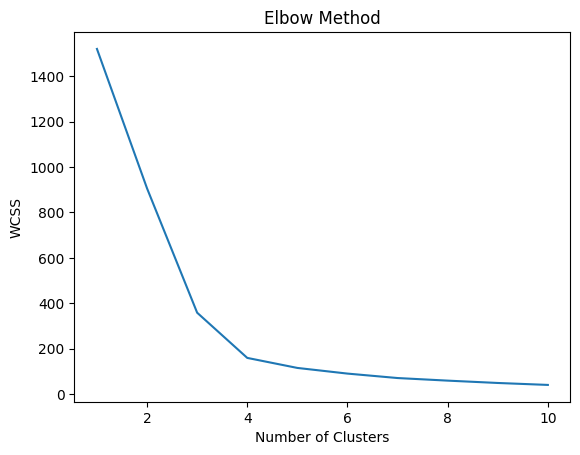

In [18]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the WCSS for each number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# 5. KMeans Clustering:

In [19]:
# Assuming optimal_clusters is determined from the Elbow plot
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
# Analyzing cluster characteristics
cluster_analysis = customer_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'TotalSales_capped': 'mean'
})

In [22]:
cluster_analysis

Recency    Frequency  TotalSales_capped
Cluster                                             
0          85.369085     5.406940       1.341370e+04
1        1269.979452    67.410959       1.226010e+05
2        1543.000000  4153.000000       4.312454e+06
3        1421.651163   311.488372       7.821816e+05

In [23]:
df.head()

InvoiceID       Date ProductID  TotalSales    Discount CustomerID  Quantity  \
0       328 2019-12-27      1684  796.610169  143.389831        185         4   
1       329 2019-12-27       524  355.932203   64.067797        185         2   
2       330 2019-12-27       192  901.694915  162.305085        230         4   
3       330 2019-12-27       218  182.754237   32.895763        230         1   
4       330 2019-12-27       247  780.101695  140.418305        230         4   

   TotalSales_capped  Discount_capped  
0         796.610169       143.389831  
1         355.932203        64.067797  
2         901.694915       162.305085  
3         182.754237        32.895763  
4         780.101695       140.418305

In [24]:
X = df[['TotalSales_capped', 'Discount_capped']]

In [25]:
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [26]:
y_preds = kmeans.predict(X)
y_preds

array([0, 0, 0, ..., 2, 1, 2], dtype=int32)

In [27]:
df['cluster'] = y_preds
df.head()

InvoiceID       Date ProductID  TotalSales    Discount CustomerID  Quantity  \
0       328 2019-12-27      1684  796.610169  143.389831        185         4   
1       329 2019-12-27       524  355.932203   64.067797        185         2   
2       330 2019-12-27       192  901.694915  162.305085        230         4   
3       330 2019-12-27       218  182.754237   32.895763        230         1   
4       330 2019-12-27       247  780.101695  140.418305        230         4   

   TotalSales_capped  Discount_capped  cluster  
0         796.610169       143.389831        0  
1         355.932203        64.067797        0  
2         901.694915       162.305085        0  
3         182.754237        32.895763        0  
4         780.101695       140.418305        0

In [28]:
df.pivot_table(values=['TotalSales_capped', 'Discount_capped'], index='cluster', aggfunc=np.mean)

Discount_capped  TotalSales_capped
cluster                                    
0             134.472229         754.759317
1             639.554915        3584.207589
2            1020.518041        5725.727264
3             344.545527        1935.117524

In [29]:
alt.data_transformers.disable_max_rows()
chart = alt.Chart(df)
scatter_plot = chart.mark_circle()
scatter_plot.encode(x='Discount_capped', y='TotalSales_capped', color='cluster:N')

alt.Chart(...)